In this notebook I want to implement a 1D and later 2D self organising map to cluster some colours

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lets create and look at some colour data

In [2]:
def constant_brightness_colour_sample(level, N):
    colour_data = np.random.randint(10,255,size=(*N,3))
    brightness = colour_data.sum(axis=2)/(255.*3)
    correction_factor = brightness**-1 * level
    colour_data = colour_data*correction_factor[:,:,np.newaxis]
    return np.clip(np.round(colour_data).astype(int), 0, 255)


In [3]:
N=(100,100) # number of data points. Put into square to make it plot nice
level=0.6
colour_data = constant_brightness_colour_sample(level, N)

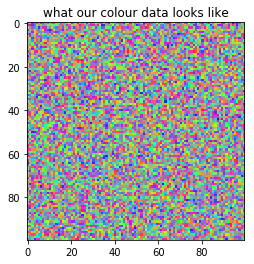

In [4]:
plt.figure()
plt.title('what our colour data looks like')
plt.imshow(colour_data)
plt.show()

we flatten the data here so we can work with it nicer

In [5]:
X = colour_data.reshape(np.product(colour_data.shape[0:2]),colour_data.shape[-1])/255.

We initiate some random weights in the map to start with

In [6]:
node_layout2D = (40,40)
W2D = np.random.random(size=(*node_layout2D, 3))

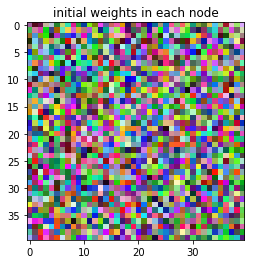

In [7]:
plt.figure()
plt.title('initial weights in each node')
plt.imshow(np.round(W2D*255).astype(int))
plt.show()

In [8]:
def sigma(sigma_0, t, lam):
    return sigma_0*np.exp(-t/float(lam))

def LR(L_0, t, lam):
    return L_0*np.exp(-t/float(lam))

In [9]:
def single_update(W, x, i, sigma_0, lam, L_0, all_i, all_j):
    nearest_ind = np.unravel_index(((W - x)**2).sum(axis=2).argmin(), W.shape[:2])
    nodes_dist = np.sqrt((all_i - nearest_ind[0])**2 + (all_j - nearest_ind[1])**2)
    nearest_ind = np.unravel_index(((W - x)**2).sum(axis=2).argmin(), W.shape[:2])
    nodes_sqr_dist = (all_i - nearest_ind[0])**2 + (all_j - nearest_ind[1])**2
    nodes_dist = np.sqrt(nodes_sqr_dist)

    sig = sigma(sigma_0, i, lam)
    L = LR(L_0, i, lam)
    theta = np.exp(-nodes_sqr_dist/(2*sig**2))

    W[nodes_dist<=sig] = \
                        W[nodes_dist<=sig] \
                        + (-W[nodes_dist<=sig]+x)*L*theta[nodes_dist<=sig, np.newaxis]
    return W

def SOM(X, W, M, L_0):
    new_weights = W.copy()
    sigma_0 = max(W.shape)/2.
    lam = M/np.log(sigma_0)
    
    all_i = np.zeros(W.shape[:2]) + np.arange(W.shape[0])[:, np.newaxis]
    all_j = np.zeros(W.shape[:2]) + np.arange(W.shape[1])[np.newaxis, :]
    
    for i in range(M):
        x = X[np.random.randint(0,X.shape[0]-1,1)[0]]
        new_weights = single_update(new_weights, x, i, sigma_0, lam, L_0,  all_i, all_j)
    return new_weights
    

In [10]:
W2D_solved = SOM(X, W2D, 1000, 0.1)

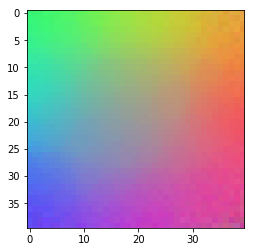

In [11]:
plt.imshow(np.round(W2D_solved*255).astype(int))
plt.show()

# Now lets try it again in 1D

In [12]:
node_layout1D = (1,10)
W1D = np.random.random(size=(*node_layout1D, 3))

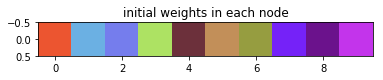

In [13]:
plt.figure()
plt.title('initial weights in each node')
plt.imshow(np.round(W1D*255).astype(int))
plt.show()

In [14]:
W1D_solved = SOM(X, W1D, 1000, 0.1)

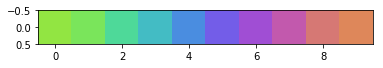

In [15]:
plt.imshow(np.round(W1D_solved*255).astype(int))
plt.show()